# Computer Vision - Exercise 6
### Object Segmentation and detection
Bright NUAKOH

In [ ]:
#Importing Modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

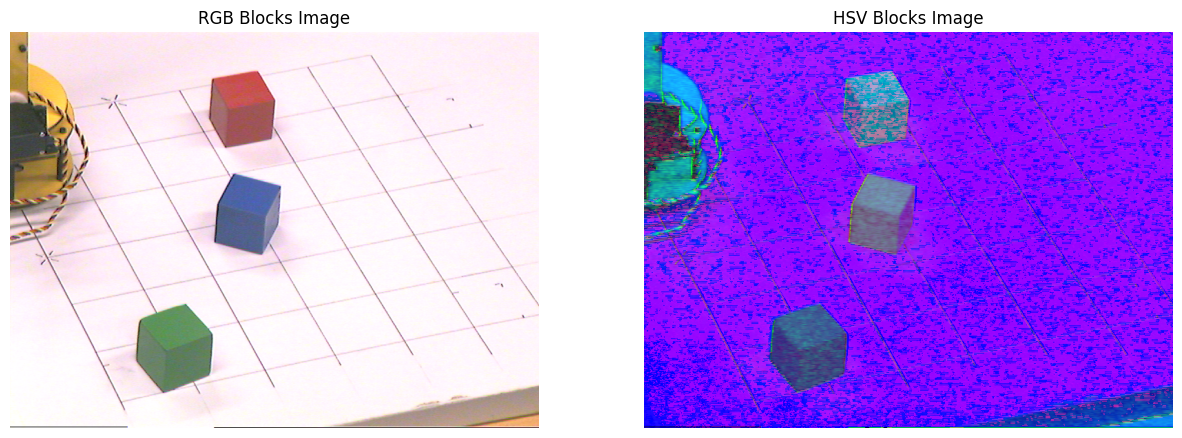

In [ ]:

def show_images(images, titles):
    fig, ax = plt.subplots(1, len(images), figsize=(15, 6))
    for idx, img in enumerate(images):
        ax[idx].imshow(img, cmap='gray' if len(img.shape) == 2 else None)
        ax[idx].set_title(titles[idx])
        ax[idx].axis('off')
    plt.show()

# Read blocks image, convert to RGB and HSV variants
blocks_img = cv2.imread('blocks-col.png')
blocks_rgb = cv2.cvtColor(blocks_img, cv2.COLOR_BGR2RGB)
blocks_hsv = cv2.cvtColor(blocks_rgb, cv2.COLOR_RGB2HSV)

# Displaying Loaded image in RGB and HSV
show_images([blocks_rgb, blocks_hsv], ['RGB Blocks Image', 'HSV Blocks Image'])

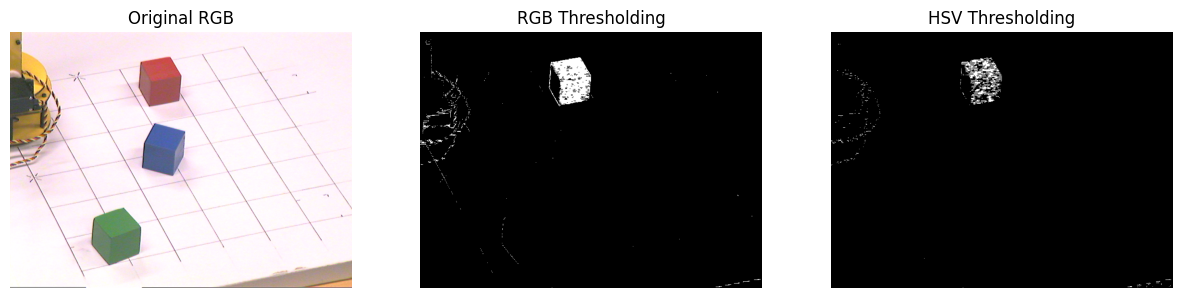

In [ ]:
# RGB thresholding
lower_rgb = np.array([100, 0, 0])
upper_rgb = np.array([255, 100, 100])
mask_rgb = cv2.inRange(blocks_rgb, lower_rgb, upper_rgb)

# HSV thresholding
lower_hsv = np.array([0, 120, 100])
upper_hsv = np.array([10, 255, 255])
mask_hsv = cv2.inRange(blocks_hsv, lower_hsv, upper_hsv)

# Display the results for the blocks image
show_images([blocks_rgb, mask_rgb, mask_hsv], ["Original RGB", "RGB Thresholding", "HSV Thresholding"])


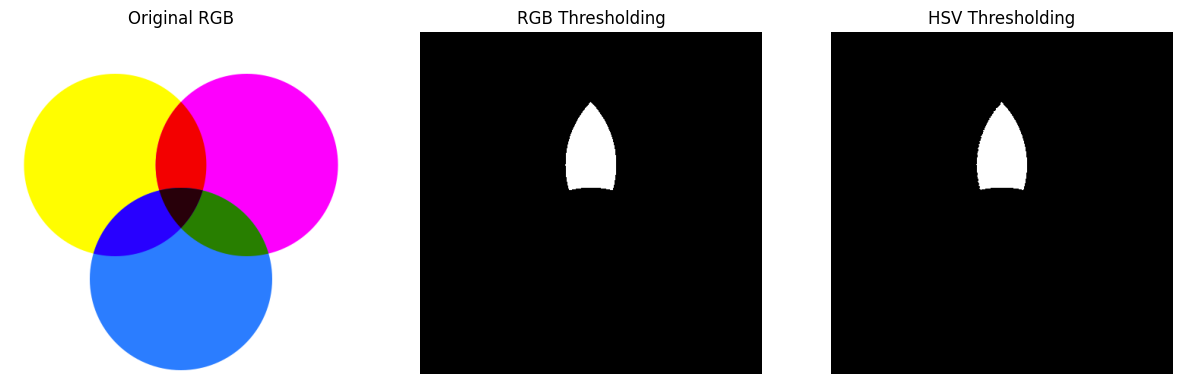

In [ ]:
# Read circles image, convert to RGB and HSV variants
circles_img = cv2.imread('circles.png')
circles_rgb = cv2.cvtColor(circles_img, cv2.COLOR_BGR2RGB)
circles_hsv = cv2.cvtColor(circles_rgb, cv2.COLOR_RGB2HSV)

# Apply same thresholds to circles image
mask_rgb_circles = cv2.inRange(circles_rgb, lower_rgb, upper_rgb)
mask_hsv_circles = cv2.inRange(circles_hsv, lower_hsv, upper_hsv)

# Display the results for the circles image
show_images([circles_rgb, mask_rgb_circles, mask_hsv_circles], ["Original RGB", "RGB Thresholding", "HSV Thresholding"])

### Comment:

The whole circle was not segmented, only a sector which was dark red (close to the one red in block image) was able to be segmented properly. The same threshold for both images worked well for both objects with same color however failed to detect the whole circle due to slight chanegs in color. HSV produced better segmentation ignoring things from the background as shown in the figures produced. One noticeable problem is segmenting other objects like the device and wires which are red but not included in object of interest.